In [1]:
'''

What support vector machine does is it basically tries to classify based upon the criterion of margin 
so if point has more margin than that of less margin then that is a better inlier than the other one.

'''


'\n\nWhat support vector machine does is it basically tries to classify based upon the criterion of margin \nso if point has more margin than that of less margin then that is a better inlier than the other one.\n\n'

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris=load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [12]:
df1=df[df.target==0]
df2=df[df.target==1]
df3=df[df.target==2]

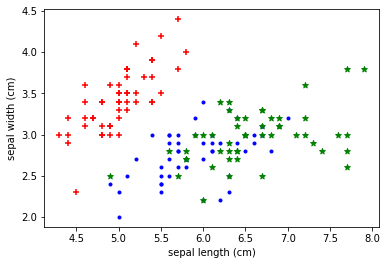

In [18]:
import matplotlib.pyplot as plt
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='.')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='green',marker='*')

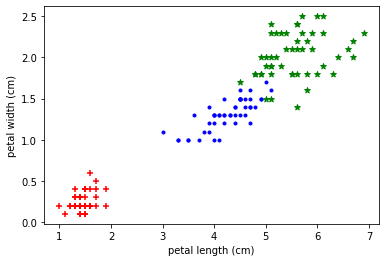

In [19]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='.')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='green',marker='*')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop(['target','flower_name'],axis='columns')

In [22]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [33]:
y=df.target

In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [36]:
len(X_train)

120

In [37]:
len(X_test)

30

In [66]:
from sklearn.svm import SVC

## For Linear

In [67]:
model=SVC(kernel='linear')

In [68]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [69]:
model.predict(X_test)

array([1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 1])

In [70]:
model.score(X_test,y_test)

0.9333333333333333

In [61]:
model.predict([[5.9,3.0,5.1,1.8]])

array([2])

## For RBF

In [71]:
model_new=SVC(kernel='rbf')

In [72]:
model_new.fit(X_train,y_train)

SVC()

In [73]:
model.predict(X_test)

array([1, 2, 1, 2, 2, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 2,
       1, 1, 1, 2, 0, 0, 0, 1])

In [74]:
model.score(X_test,y_test)

0.9333333333333333